### Setup Work's Environment

In [2]:
# version 
import sys 
assert sys.version_info>=(3,5)
import sklearn 
assert sklearn.__version__>="0.20"

#warnings :
import warnings
warnings.filterwarnings('ignore')

# common imports 
import numpy as np
import pandas as pd 
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# assert pretty visualisation plots:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15}
mpl.rc('font', **font)
plt.rcParams["figure.figsize"] = (20,9)

# saving visualisation function :
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('/home/dhia/Pictures/', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## I. Linear Regression using:

we will start by looking at the Linear Regression model, one of the
simplest models there is. We will discuss two very different ways to train it:


• Using a direct “closed-form” equation that directly computes the model parame‐
ters that best fit the model to the training set (i.e., the model parameters that
minimize the cost function over the training set).


• Using an iterative optimization approach, called Gradient Descent (GD), that
gradually tweaks the model parameters to minimize the cost function over the
training set, eventually converging to the same set of parameters as the first
method. We will look at a few variants of Gradient Descent that we will use again
and again when we study neural networks
### 1. Normal Equation:

Generally, a linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term (also called the intercept
term).

**Linear Regression model prediction (vectorized form):**

       y = h(θ). x = θ · x

**MSE cost function for a Linear Regression model**

      MSE=(1/m)*sum(sqr(y-y^))

**Normal Equation**:

      θ^ = inv(transp(X).X).transp(X).y
     

In [38]:
np.random.seed(42)
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1) # adding a gaussian noise 
# using the normal equation to search for theta_best:

X_b=np.c_[np.ones((100,1)),X] #X_biaised
#serach for o^:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.01697793],
       [3.00714294]])

We would have hoped for θ_0= 4 and θ_1 = 3 instead

Close
enough, but the noise made it impossible to recover the exact parameters of the original function.

In [39]:
#Let's make some predictions
x=np.array([[0],[2]])
x_b=np.c_[np.ones((2,1)),x]
y_predicted=x_b.dot(theta_best)
y_predicted

array([[ 4.01697793],
       [10.03126382]])

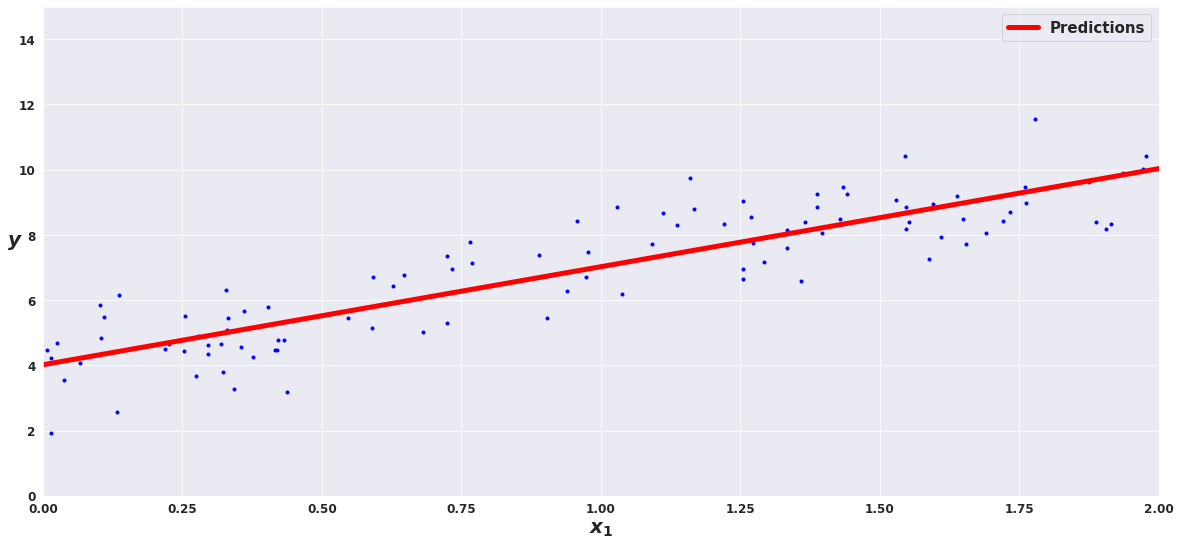

<Figure size 720x360 with 0 Axes>

In [88]:
# comparing predictions and real data :
sns.set_style('darkgrid')
plt.plot(X,y,'b.')
plt.plot(x,y_predicted,'r-',label='Predictions')
plt.legend()
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$y$',rotation=0,fontsize=20)
plt.axis([0, 2, 0, 15])
plt.figure(figsize=(10,5))
plt.show()

**Performing using Sklearn**

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.01697793]), array([[3.00714294]]))

In [47]:
lin_reg.predict(x)

array([[ 4.01697793],
       [10.03126382]])

The LinearRegression class is based on the **scipy.linalg.lstsq() function (the
name stands for “least squares”)**, which you could call directly:

```python
  theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
  theta_best_svd
```

This function computes θ = X⁺+ y, where **X⁺ is the pseudoinverse of X** (specifically the
Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
verse directly:
```python
 np.linalg.pinv(X_b).dot(y)
###array([[4.21509616],[2.77011339]])
```

The pseudoinverse itself is computed using a standard matrix factorization technique
called **Singular Value Decomposition (SVD)**

This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix X T X is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.



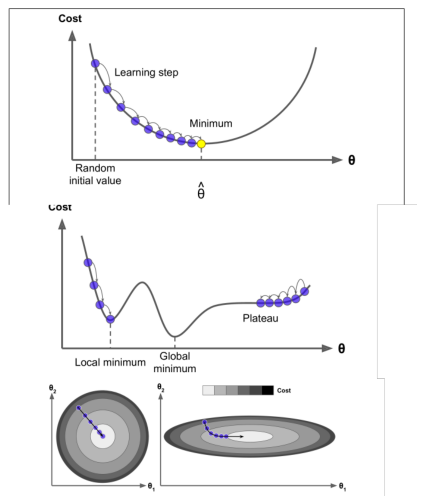

In [50]:
from PIL import Image
GD_photo=Image.open('/home/dhia/Downloads/GD.png')
arr_rGD=np.array(GD_photo)
plt.axis("off")
plt.imshow(GD_photo)

### 2.Gradient Descent:
   
   **- A small introduction to GD Process:**
   
 The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.  
it measures the local gradient of the error function with regards to the
parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!
Concretely, you start by filling θ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum.

   - The learning Rate:
            
     1. An important parameter in Gradient Descent is the size of the steps, determined by the learning rate              hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations        to converge, which will take a long time 
               
     2. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the          other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger        and larger values, failing to find a good solution



Finally, not all cost functions look like nice regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum very
difficult. Figure 4-6 shows the two main challenges with Gradient Descent: if the ran‐
dom initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will
take a very long time to cross the plateau, and if you stop too early you will never
reach the global minimum.

Fortunately, the MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve.

on the left the Gradient Descent algorithm goes straight toward the
minimum, thereby reaching it quickly, whereas on the right it first goes in a direction
almost orthogonal to the direction of the global minimum, and it ends with a long
march down an almost flat valley. It will eventually reach the minimum, but it will
take a long time.
---> When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.


   **- Batch Gradient Descent**

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of trainingdata at every step (actually, Full Gradient Descent would probablybe a better name). As a result it is terribly slow on very large train‐ing sets (but we will see much faster Gradient Descent algorithmsshortly). However, Gradient Descent scales well with the number offeatures; training a Linear Regression model when there are hun‐dreds of thousands of features is much faster using GradientDescent than using the Normal Equation or SVD decomposition.


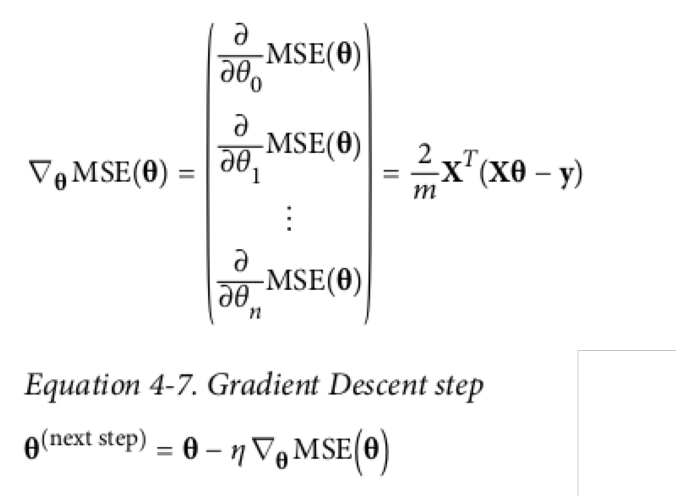

In [57]:
from PIL import Image
GD_photo=Image.open('/home/dhia/Downloads/10.png')
arr_rGD=np.array(GD_photo)
plt.axis("off")
plt.imshow(GD_photo)
print("Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of trainingdata at every step (actually, Full Gradient Descent would probablybe a better name). As a result it is terribly slow on very large train‐ing sets (but we will see much faster Gradient Descent algorithmsshortly). However, Gradient Descent scales well with the number offeatures; training a Linear Regression model when there are hun‐dreds of thousands of features is much faster using GradientDescent than using the Normal Equation or SVD decomposition.")

In [138]:
np.random.seed(42)
eta=0.1
iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(1,iterations):
    gradient=(2/m)*(X_b.T.dot(X_b.dot(theta)-y))
    theta=theta-eta*gradient
print('theta_best \n',theta)    

theta_best 
 [[4.01697793]
 [3.00714294]]


In [144]:
np.random.seed(42)
bgd_theta_path=[]
def plot_batch_gradient_descent(X,y,eta,m):
    iterations=10
    plt.plot(X, y, "b.")
    theta=np.random.randn(2,1)
    X_b=np.c_[np.ones((100,1)),X] #X_biaised
    for iteration in range(1,iterations):
      gradient=(2/m)*(X_b.T.dot(X_b.dot(theta)-y))
      theta=theta-eta*gradient
      bgd_theta_path.append(theta)
      y_predicted=X_b.dot(theta)
      plt.title('$\eta =$'+str(eta),fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 22})
      plt.xlabel('$x_1$',fontsize=20)
      plt.ylabel('$y$',rotation=0,fontsize=20) 
      plt.axis([0, 2, 0, 15])
      plt.plot(X,y_predicted)
        

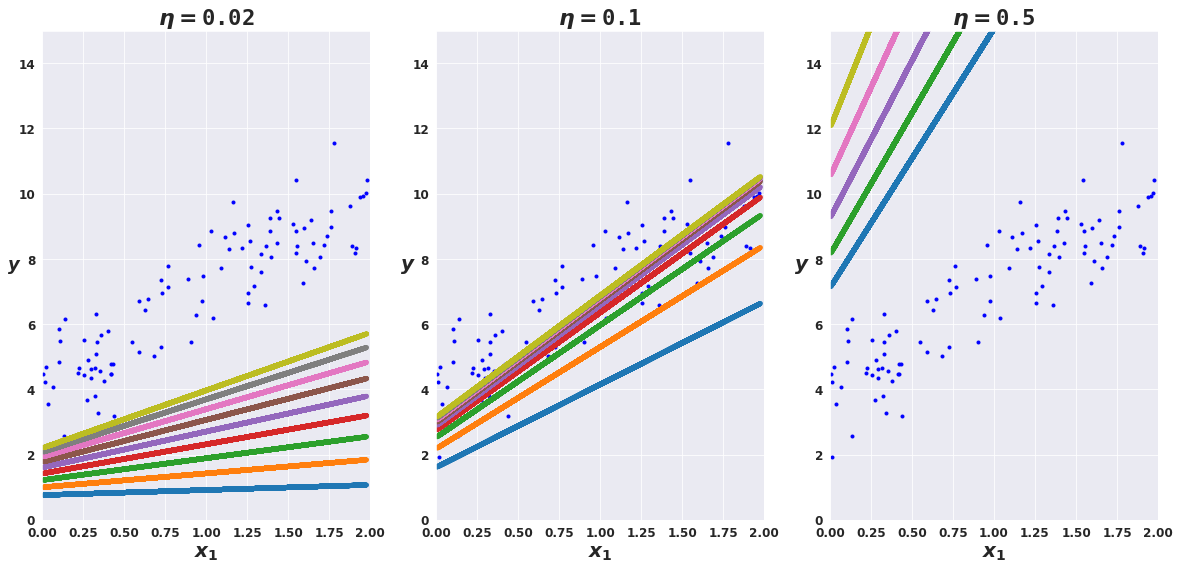

In [145]:
plt.subplot(131); plot_batch_gradient_descent(X,y,0.02,100)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_batch_gradient_descent(X,y,0.1,100)
plt.subplot(133); plot_batch_gradient_descent(X,y,0.5,100)

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in
just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually
getting further and further away from the solution at every step.
To find a good learning rate, you can use **grid search**. However, you
may want to limit the number of iterations so that grid search can eliminate models
that take too long to converge.


You may wonder how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops, but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ε (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

In [84]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = x_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


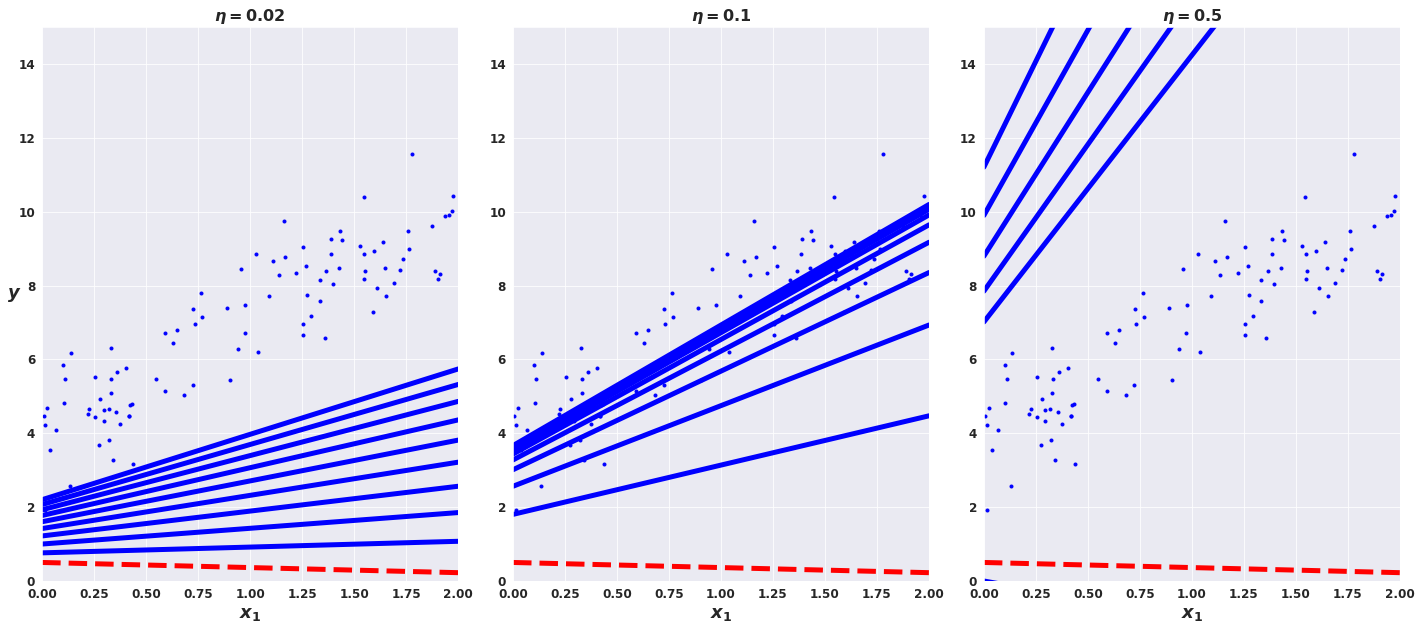

In [86]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

####  Stochastic Gradient Descent 
   - **Manually:**
   
   
The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure). So once the algorithm stops, the final parameter values are good, but not optimal.

When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired from the process of annealing in metallurgy where molten
metal is slowly cooled down. The function that determines the learning rate at each
iteration is called the learning schedule. If the learning rate is reduced too quickly, you
may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
the learning rate is reduced too slowly, you may jump around the minimum for a
long time and end up with a suboptimal solution if you halt training too early.

In [117]:
n_epochs=50
t0,t1=5,50
np.random.seed(42)
def learning_schedule(n):
    return(t0/(t1+n))
theta=np.random.randn(2,1)
X_b=np.c_[np.ones((100,1)),X] #X_biaised
for epoch in range (n_epochs):
    for i in range(len(X)):
        random_index=np.random.randint(0,len(X))
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradient=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*len(X)+i)
        theta=theta-eta*gradient
theta        

array([[4.00715607],
       [2.9356309 ]])

In [146]:
sgd_theta_path=[]
def plot_SGD(X,y,n_epochs,eta):
  np.random.seed(42)  
  X_b=np.c_[np.ones((100,1)),X] #X_biaised
  theta=np.random.randn(2,1)
  for epoch in range (n_epochs):
    for i in range(len(X)):
        random_index=np.random.randint(0,len(X))
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradient=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*len(X)+i)
        theta=theta-eta*gradient
        ### get our theta then :
    sgd_theta_path.append(theta)    
    y_predicted=X_b.dot(theta)
    plt.plot(X,y_predicted)
    plt.title('last '+'$\eta =$'+str(eta),fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 22})
    plt.xlabel('$x_1$',fontsize=20)
    plt.ylabel('$y$',rotation=0,fontsize=20) 
    plt.axis([0, 2, 0, 15])

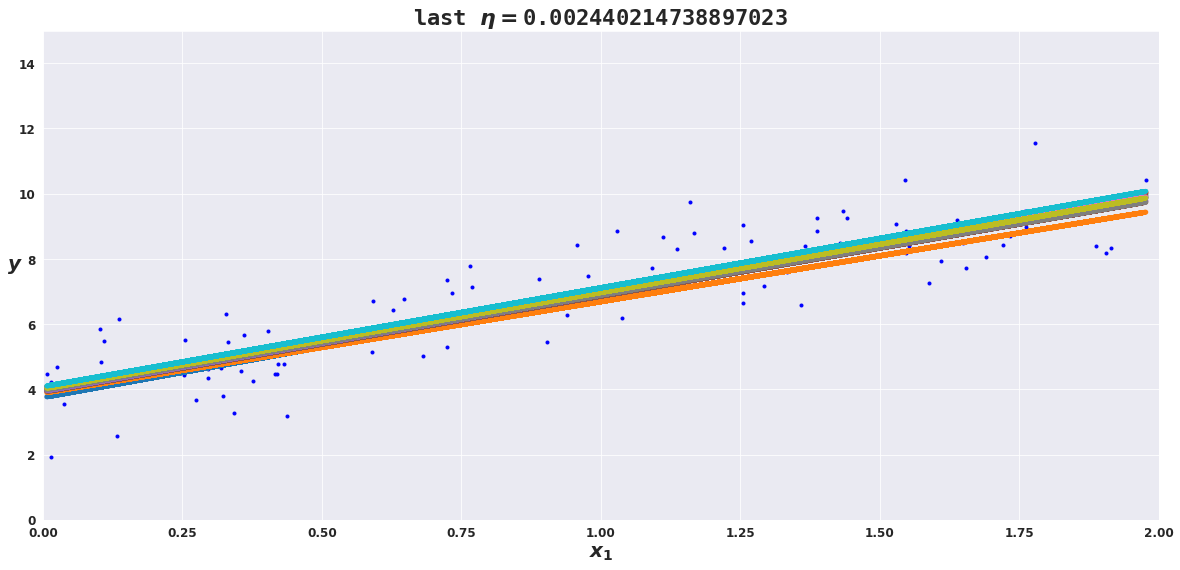

In [147]:
plt.plot(X,y,'b.')
plot_SGD(X,y,20,0.5)

Note that since instances are picked randomly, some instances may be picked several
times per epoch while others may not be picked at all. If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set (making sure to shuffle the input features and the labels jointly), then
go through it instance by instance, then shuffle it again, and so on. However, this generally converges more slowly.


When using Stochastic Gradient Descent, the training instances
must be independent and identically distributed (IID), to ensure
that the parameters get pulled towards the global optimum, on
average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the train‐
ing set at the beginning of each epoch). If you do not do this, for
example if the instances are sorted by label, then SGD will start by
optimizing for one label, then the next, and so on, and it will not
settle close to the global minimum.

  - **Using SGDRegressor from sklearn:**
  
  To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function. The following code runs for maximum 1000 epochs ( max_iter=1000 ) or until the loss drops
by less than 1e-3 during one epoch ( tol=1e-3 ), starting with a learning rate of 0.1
( eta0=0.1 ), using the default learning schedule (different from the preceding one),
and it does not use any regularization ( penalty=None ; more details on this shortly):

In [148]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,eta0=0.1,tol=1e-3,penalty=None)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [149]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.03618124]), array([3.01257604]))

####  Mini Batch Descent:

instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called mini-
batches.

As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima (in the case of problems that suffer from
local minima, unlike Linear Regression as we saw earlier).

In [151]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)



In [154]:
theta_path_bgd = np.array(bgd_theta_path)
theta_path_sgd = np.array(sgd_theta_path)
theta_path_mgd = np.array(theta_path_mgd)

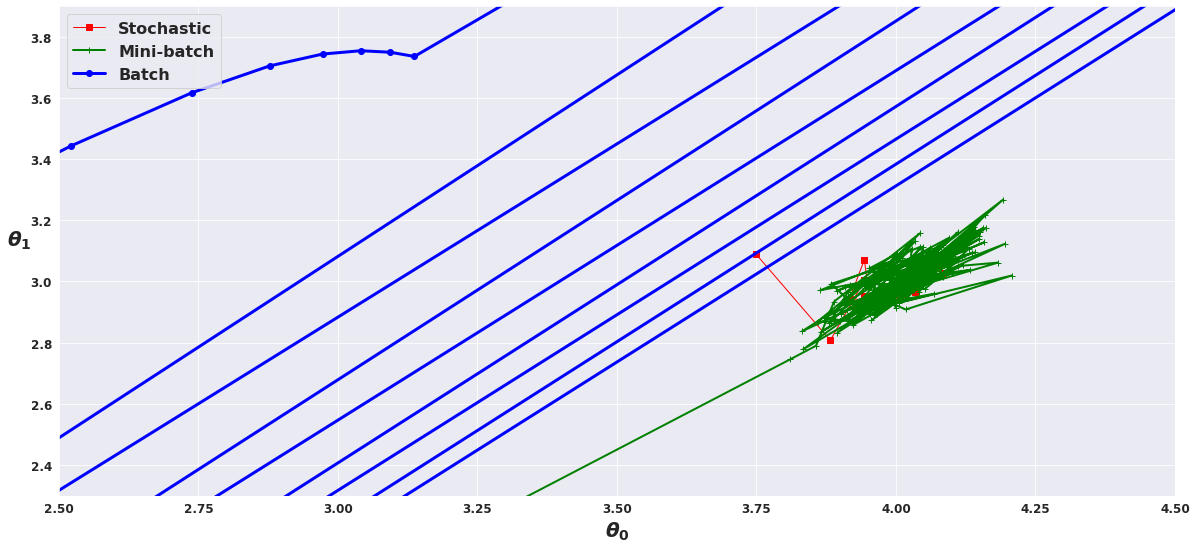

In [156]:
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

They all end up near the minimum, but Batch GD’s path actually stops at the
minimum, while both Stochastic GD and Mini-batch GD continue to walk around.
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

**Let's summarize:**

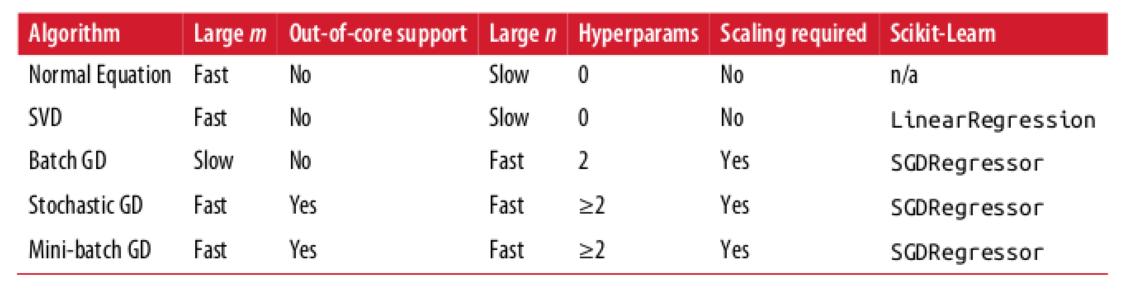

In [160]:
from PIL import Image
photo=Image.open('/home/dhia/Pictures/30.png')
arr=np.array(photo)
plt.axis("off")
plt.imshow(photo)

## II. polynomial Regression:

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

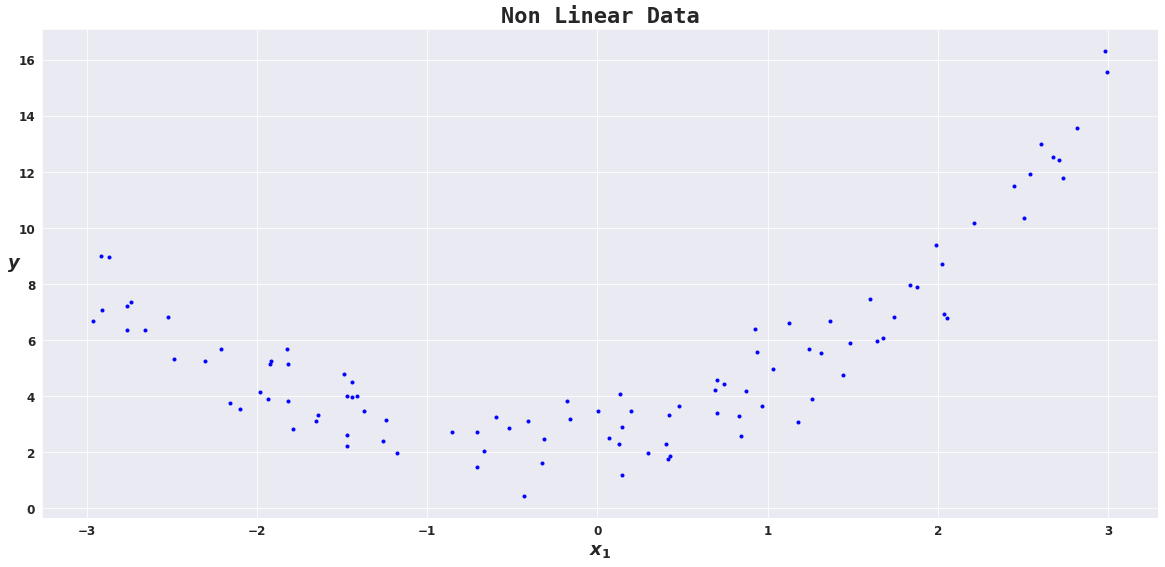

In [116]:
# let's generate our data :
nb_features=100
np.random.seed=42
X=6*np.random.rand(nb_features,1)-3 # just to have a parabolic curve shown in the plot
y=0.5+X**2+X+2+np.random.randn(nb_features,1)


# plotting X,y:
def plot_non_linear_data(X,y):
 sns.set_style('darkgrid')
 plt.plot(X,y,'b.')
 plt.xlabel('$x_1$',fontsize=18)
 plt.ylabel('$y$',fontsize=18,rotation=0)
 plt.title('Non Linear Data',fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 22})
 plt.show()

plot_non_linear_data (X,y)   

let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2 nd -degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [117]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)

X_poly=poly_features.fit_transform(X)

In [118]:
pd.DataFrame(X)

,0
0,-1.644423
1,-2.918122
2,0.129227
3,0.689435
4,-1.468757
...,...
95,1.674956
96,-1.444331
97,1.739326
98,-2.212552


In [119]:
pd.DataFrame(X_poly)


,0,1
0,-1.644423,2.704126
1,-2.918122,8.515436
2,0.129227,0.016700
3,0.689435,0.475321
4,-1.468757,2.157246
...,...,...
95,1.674956,2.805477
96,-1.444331,2.086092
97,1.739326,3.025253
98,-2.212552,4.895387


In [120]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

# show model coefficients:

print(lin_reg.intercept_ )# constant
lin_reg.coef_

[2.53712465]


array([[1.01634645, 0.9950937 ]])

Text(0.5, 1.0, 'Quadratic Predictions')

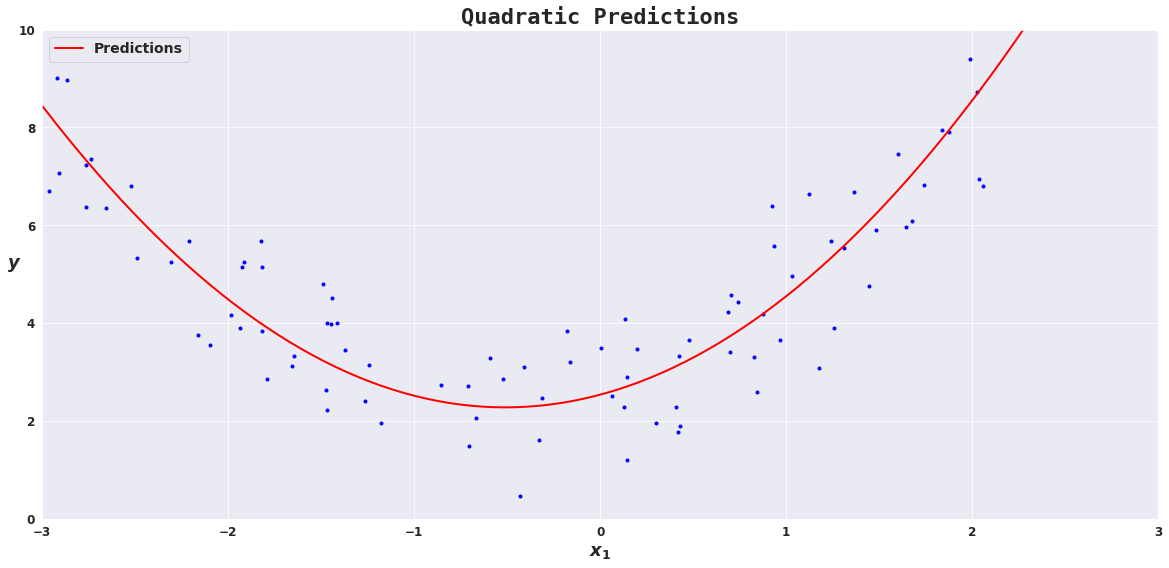

In [121]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title('Quadratic Predictions',fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 22})

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were
two features a and b, PolynomialFeatures with degree=3 would not only add the
features a² , a³ , b² , and b³, but also the combinations ab, a²b, and ab².

  #### Learning Curves 
  
  If you perform high-degree Polynomial Regression, you will likely fit the training
data much better than with plain Linear Regression. For example, Figure 4-14 applies
a 300-degree polynomial model to the preceding training data, and compares the
result with a pure linear model and a quadratic model (2 nd -degree polynomial).
Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

(-3.3, 3.3, 0.0, 10.0)

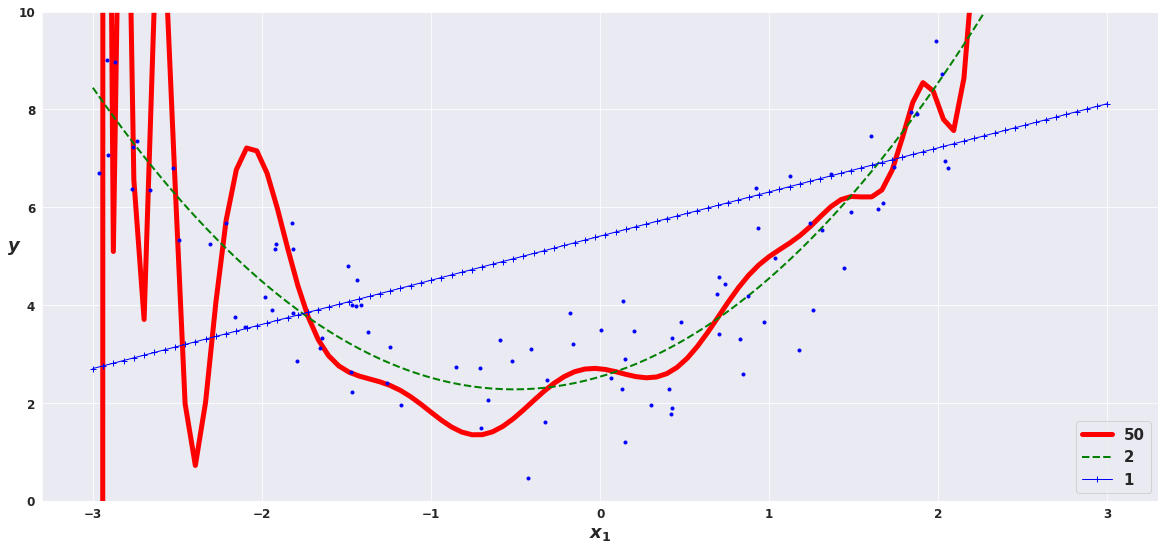

In [125]:
#plotting  linear regressors with different degrees:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
sns.set_style('darkgrid')
for style,width,degree in(('r-',5,50),('g--',2,2),('b-+',1,1)):
    std_scaler=StandardScaler()
    poly_features=PolynomialFeatures(degree=degree,include_bias=False)
    lin_reg=LinearRegression()
    pipeline=Pipeline([
        ("std_scaler",std_scaler),
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)])
    pipeline.fit(X,y)
    predictions=pipeline.predict(X_new)
    plt.plot(X_new,predictions,style,linewidth=width,label=str(degree))
plt.plot(X,y,'b.',linewidth=3)    
plt.legend(loc="lower right")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3.3, 3.3, 0, 10])

Of course, this high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. The model that will generalize
best in this case is the quadratic model. It makes sense since the data was generated
using a quadratic model, but in general you won’t know what function generated the
data, so how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data?
We have already used **cross-validation** to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.


**Another way is to look at the learning curves**: these are plots of the model’s performance on the training set and the validation set as a function of the training set size
(or the training iteration). To generate the plots, simply train the model several times
on different sized subsets of the training set.


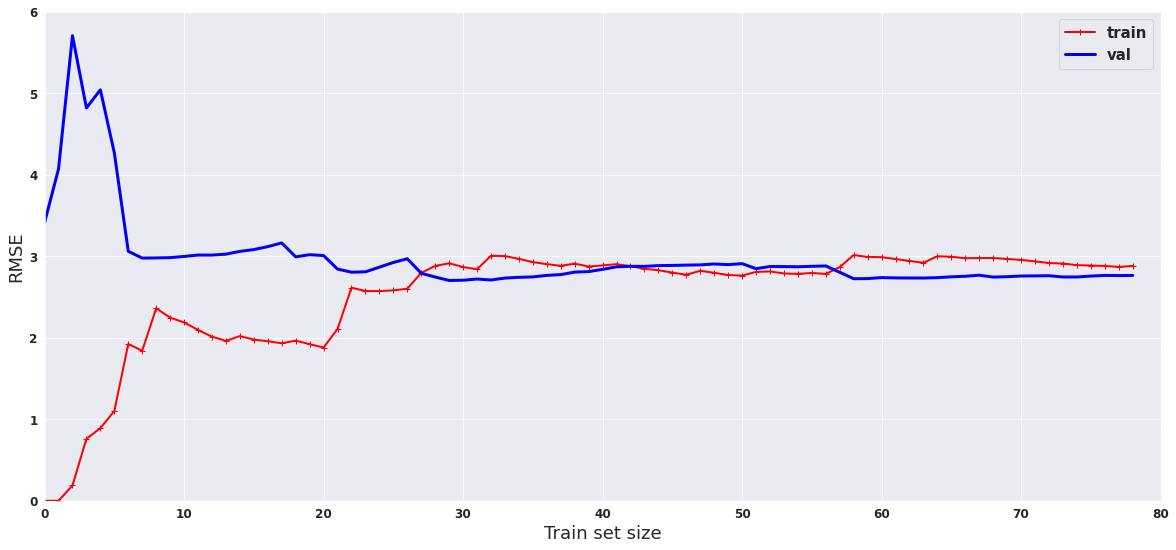

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# learning curve function
def plot_learning_curve(model,X,y):
   X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,test_size=0.2)
   train_errors=[]
   val_errors=[] 
   for index in range(1,len(X_train)):
        model.fit(X_train[:index],y_train[:index])
        y_train_predict=model.predict(X_train[:index])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:index],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
   sns.set_style('darkgrid')  
   plt.xlabel("Train set size", fontsize=18)
   plt.ylabel("RMSE", rotation=90, fontsize=18)
   plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
   plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
   plt.legend(loc="upper right")
   plt.axis([0,80,0,6])
    
    #plot the curve
    
model=LinearRegression()
plot_learning_curve(model,X,y)

First, let’s look at the performance on the training
data: 
when there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added
to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on
the training data goes up until it reaches a plateau, at which point adding new instan‐
ces to the training set doesn’t make the average error much better or worse. 

Now let’s
look at the performance of the model on the validation data. When the model is
trained on very few training instances, it is incapable of generalizing properly, which
is why the validation error is initially quite big. Then as the model is shown more
training examples, it learns and thus the validation error slowly goes down. However,
once again a straight line cannot do a good job modeling the data, so the error ends
up at a plateau, very close to the other curve.


These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high. 

**(if your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model
or come up with better features.)**

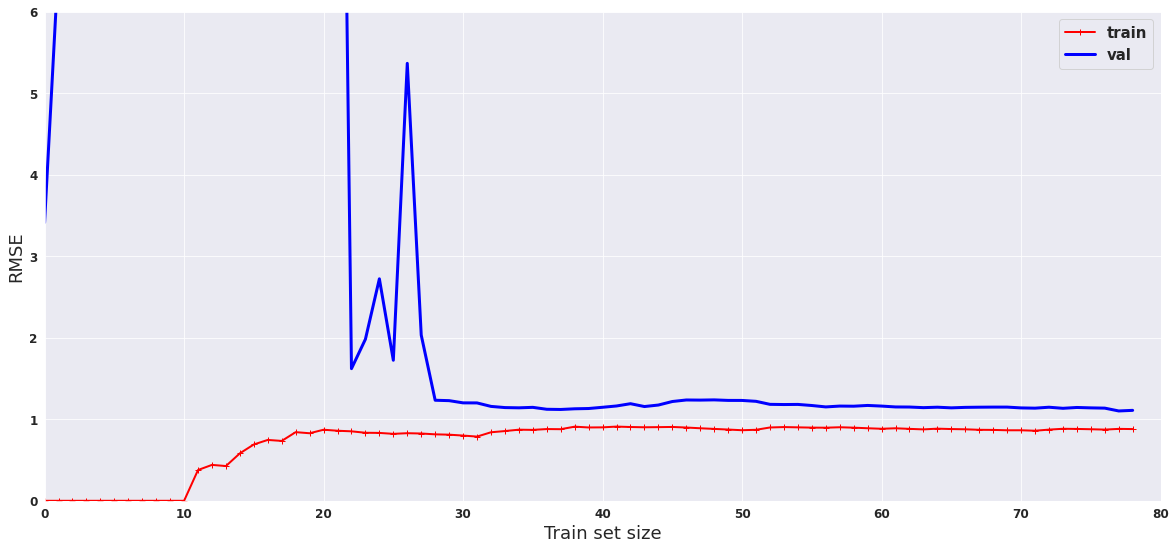

In [127]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curve(polynomial_regression, X, y)


These learning curves look a bit like the previous ones, but there are two very important differences:


• The error on the training data is much lower than with the Linear Regression
model.


• There is a gap between the curves. This means that the model performs signifi‐
cantly better on the training data than on the validation data, which is the hall‐
mark of an overfitting model. However, if you used a much larger training set,
the two curves would continue to get closer.

- One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

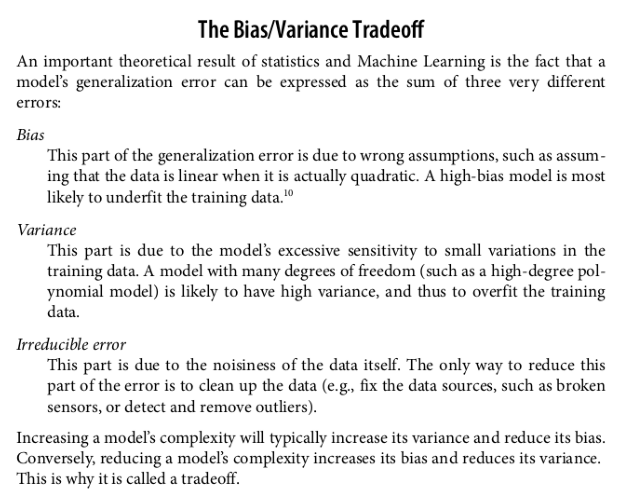

In [128]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Pictures/40.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo)

## Regularized Linear Models:

a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. For example, a simple way to regularize a polynomial model
is to reduce the number of polynomial degrees.
For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

 ### Ridge Regression:
 
 Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to α∑ n i = 1 θ i 2 is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.


It is quite common for the cost function used during training to be
different from the performance measure used for testing. Apart
from regularization, another reason why they might be different is
that a good training cost function should have optimization friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. A good
example of this is a classifier trained using a cost function such as
the log loss (discussed in a moment) but evaluated using precision/
recall.


The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.
 

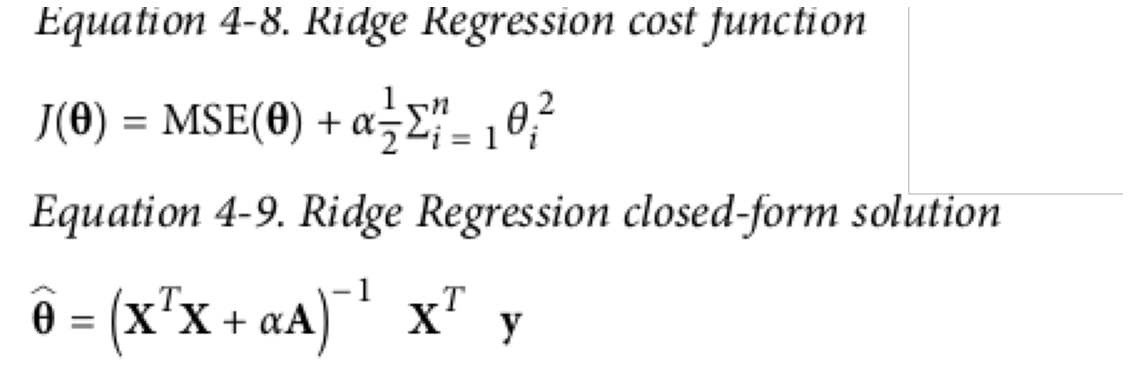

In [129]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Downloads/43.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo)

**It is important to scale the data (e.g., using a StandardScaler )
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.**

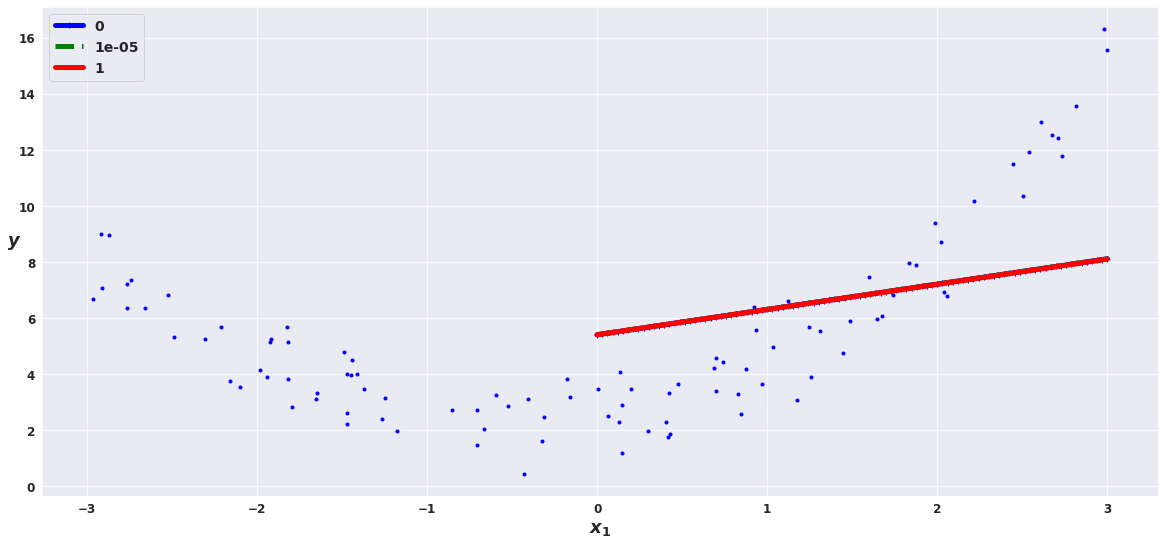

In [130]:
from sklearn.linear_model import Ridge
X_new=np.linspace(0,3,100).reshape(100,1)
plt.plot(X,y,'b.')
for alpha ,style in ((0,'b-+'),(0.00001,'g--'),(1,'r-')):
   Ridge_reg=Ridge(alpha=alpha,solver="cholesky")
   Ridge_reg.fit(X,y)
   z_predictions=Ridge_reg.predict(X_new)
   sns.set_style('darkgrid')
   plt.xlabel("$x_1$", fontsize=18)
   plt.ylabel("$y$", rotation=0, fontsize=18)
   plt.plot(X_new,z_predictions,style,label=str(alpha))
   plt.legend(loc="upper left", fontsize=14)
   

Saving figure ridge_regression_plot


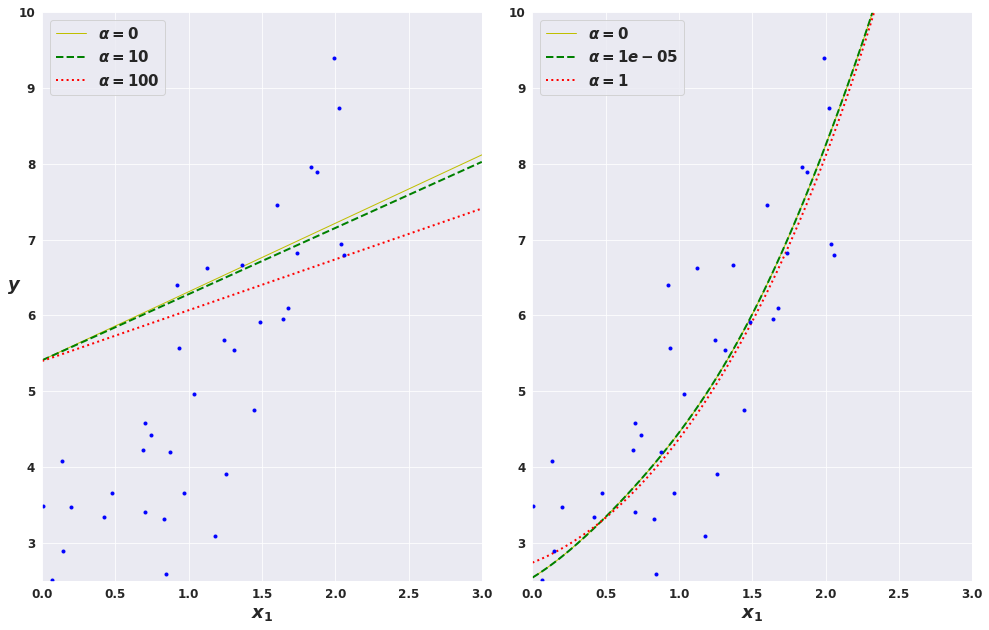

In [138]:


from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("y-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,3,2.5,10])
plt.figure(figsize=(14,9))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()



### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the L1 norm
of the weight vector instead of half the square of the L2 norm

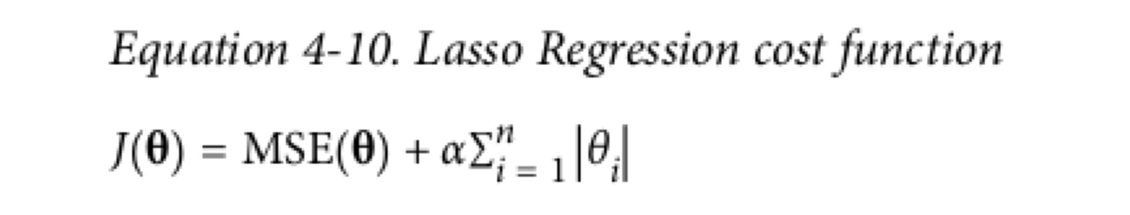

In [139]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Pictures/45.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo)

Saving figure Lasso_regression_plot


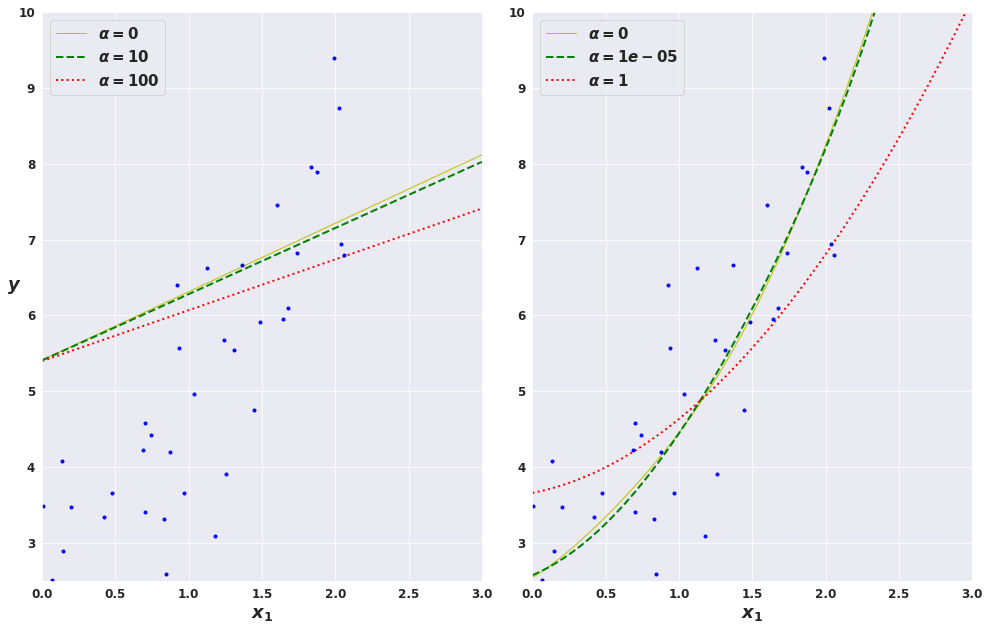

In [140]:


from sklearn.linear_model import Lasso

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("y-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,3,2.5,10])
plt.figure(figsize=(14,9))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("Lasso_regression_plot")
plt.show()



An important characteristic of Lasso Regression is that it tends to completely elimi‐
nate the weights of the least important features (i.e., set them to zero). For example,
the dashed line in the right plot on Figure 4-18 (with α = 10 -7 ) looks quadratic, almost
linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).


You can get a sense of why this is the case by looking at Figure 4-19: on the top-left
plot, the background contours (ellipses) represent an unregularized MSE cost function (α = 0), and the white circles show the Batch Gradient Descent path with that
cost function. The foreground contours (diamonds) represent the l 1 penalty, and the
triangles show the BGD path for this penalty only (α → ∞). Notice how the path first
reaches θ1 = 0, then rolls down a gutter until it reaches θ2 = 0. On the top-right plot,
the contours represent the same cost function plus an l 1 penalty with α = 0.5. The
global minimum is on the θ2 = 0 axis. BGD first reaches θ2 = 0, then rolls down the
gutter until it reaches the global minimum. The two bottom plots show the same
thing but uses an L2 penalty instead. The regularized minimum is closer to θ = 0 than
the unregularized minimum, but the weights do not get fully eliminated.

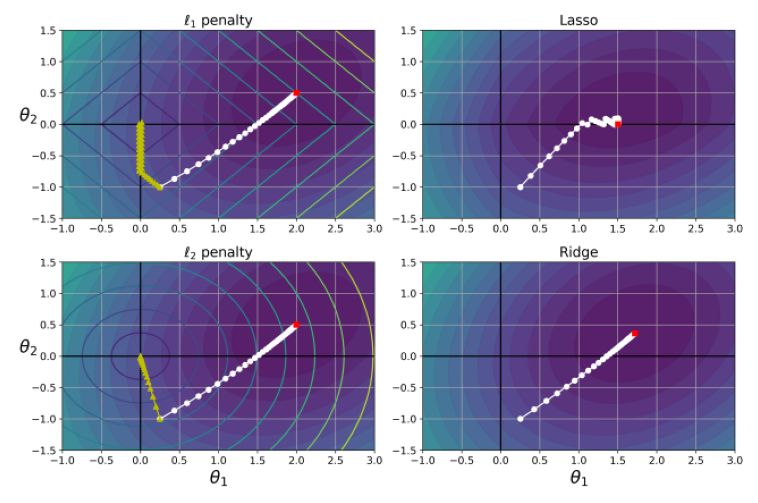

In [141]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Pictures/46.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo)

**On the Lasso cost function, the BGD path tends to bounce across
the gutter toward the end. This is because the slope changes
abruptly at θ 2 = 0. You need to gradually reduce the learning rate in
order to actually converge to the global minimum.**

### Elastic Net:

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should pre‐
fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.



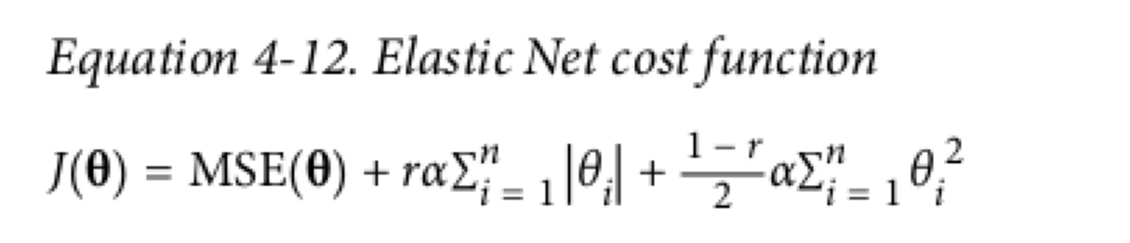

In [142]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Pictures/47.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo)

In [143]:
# Here is a short example using Scikit-Learn’s ElasticNet ( l1_ratio corresponds to the mix ratio r):
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([6.71397898])

So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net?

It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. 

**Ridge** is a good
default, but if you suspect that only a few features are actually useful, you should prefer **Lasso or Elastic Net** since they tend to reduce the useless features’ weights down to
zero as we have discussed. **In general, Elastic Net is preferred over Lasso** since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.


## Logistic Regression :

**Logistic Regression** (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class.


If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

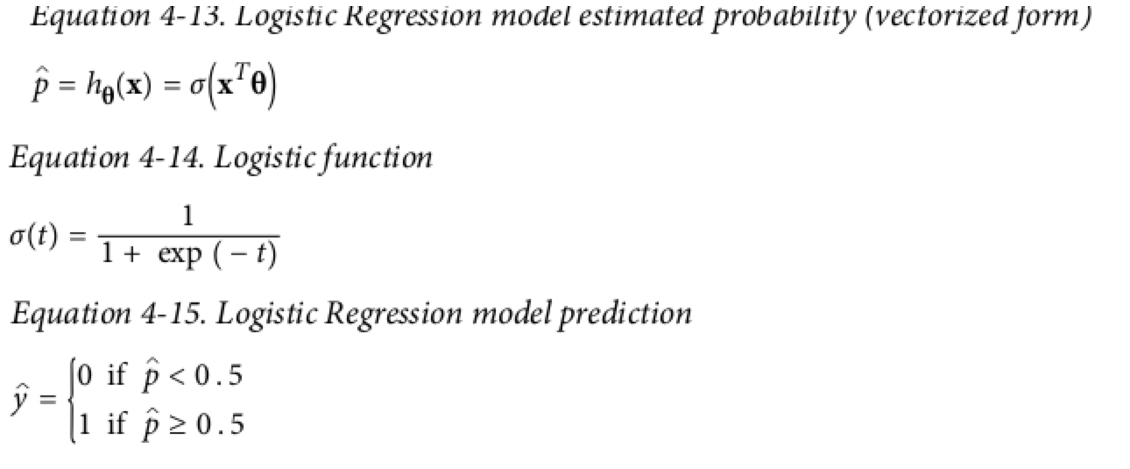

In [150]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Downloads/55.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo)   

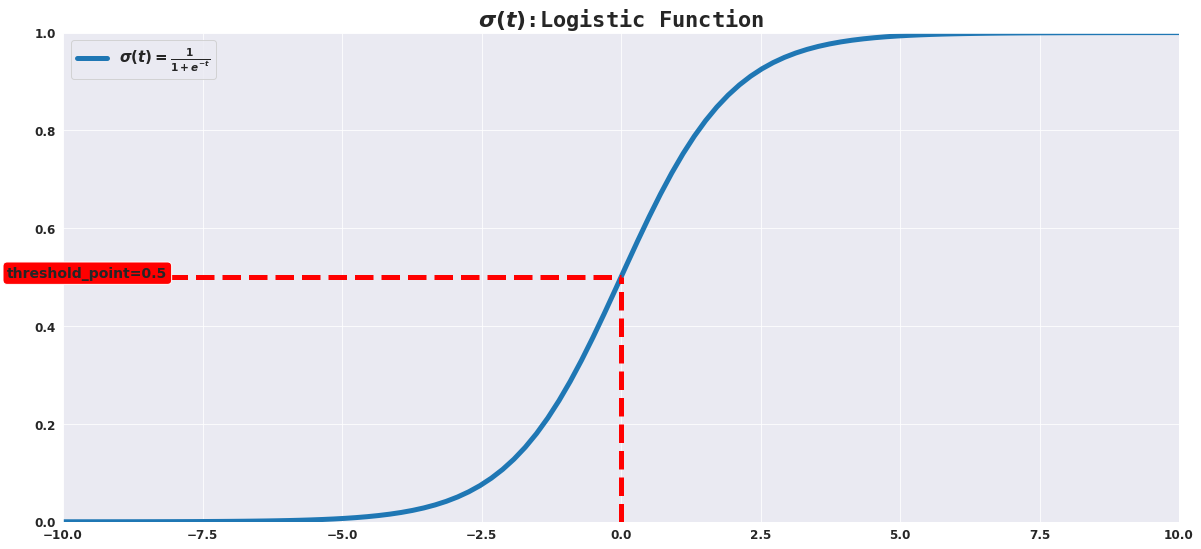

In [177]:
# plot logistic function
def logistic_function(t):
    return 1/(1+np.exp(-t))
def plot_logistic_function():
    X=np.linspace(-10,10,100)
    y=np.array([logistic_function(e) for e in X])
    plt.plot(X,y,label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
    plt.plot([0,0],[0,0.5],'r--')
    plt.plot([-10,0],[0.5,0.5],'r--')
    plt.annotate('threshold_point=0.5',xy=(-10,0.5),xytext=(-11,0.5),fontsize=14,
                   arrowprops=dict(arrowstyle='->',ec='red',lw=0.3),bbox=dict(boxstyle="round",fc='red'))
    plt.title('$\sigma(t)$:Logistic Function',fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 22})
    plt.legend(loc='upper left')
    sns.set_style('darkgrid')
    plt.axis([-10,10,0,1])
    plt.show()
plot_logistic_function() 

Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result

Once the Logistic Regression model has estimated the probability p^ = hθ(x) that an
instance x belongs to the positive class, it can make its prediction ŷ easily

Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression
model predicts 1 if x.T.dot(θ) is positive, and 0 if it is negative.

**Good, now you know how a Logistic Regression model estimates probabilities and
makes predictions. But how is it trained? The objective of training is to set the param‐
eter vector θ so that the model estimates high probabilities for positive instances (y =1)and low probabilities for negative instances (y = 0). This idea is captured by the
cost function shown in Equation 4-16 for a single training instance x.**

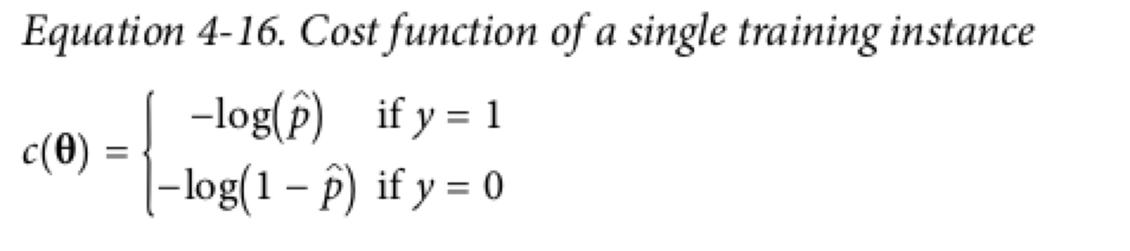

In [162]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Pictures/56.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo) 

This cost function makes sense because – log(t) grows very large when t approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive
instance, and it will also be very large if the model estimates a probability close to 1
for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so
the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance, which is precisely what we want.
The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression (as you can verify easily), called
the log loss,

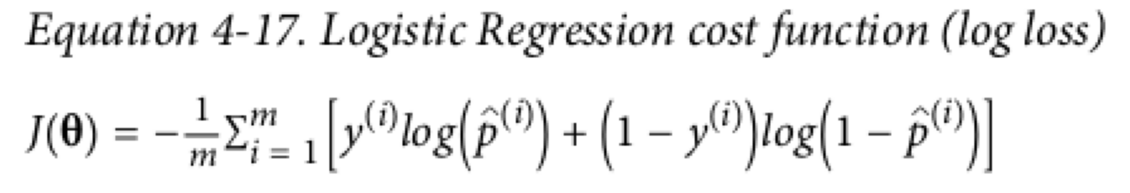

In [163]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Pictures/57.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo) 

The bad news is that there is no known closed-form equation to compute the value of
θ that minimizes this cost function (there is no equivalent of the Normal Equation).
But the good news is that this cost function is convex, so Gradient Descent (or any
other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost
function with regards to the j^th model parameter θ(j) is given by

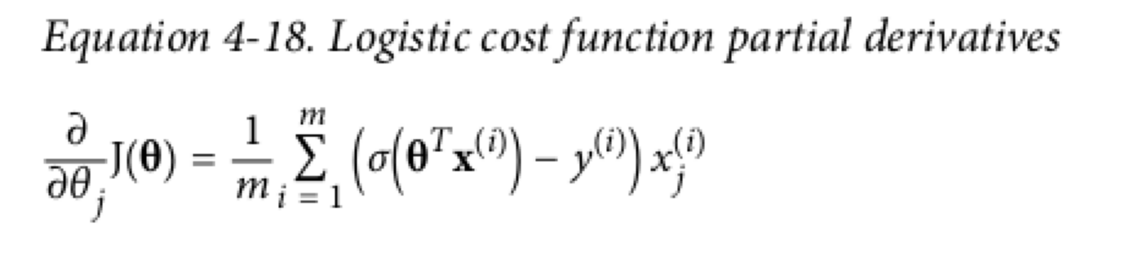

In [164]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Pictures/58.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo) 

for each instance it computes the
prediction error and multiplies it by the j th feature value, and then it computes the
average over all training instances. Once you have the gradient vector containing all
the partial derivatives you can use it in the Batch Gradient Descent algorithm. That’s
it: you now know how to train a Logistic Regression model. For Stochastic GD you
would of course just take one instance at a time, and for Mini-batch GD you would
use a mini-batch at a time.

In [165]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


In [178]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [166]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

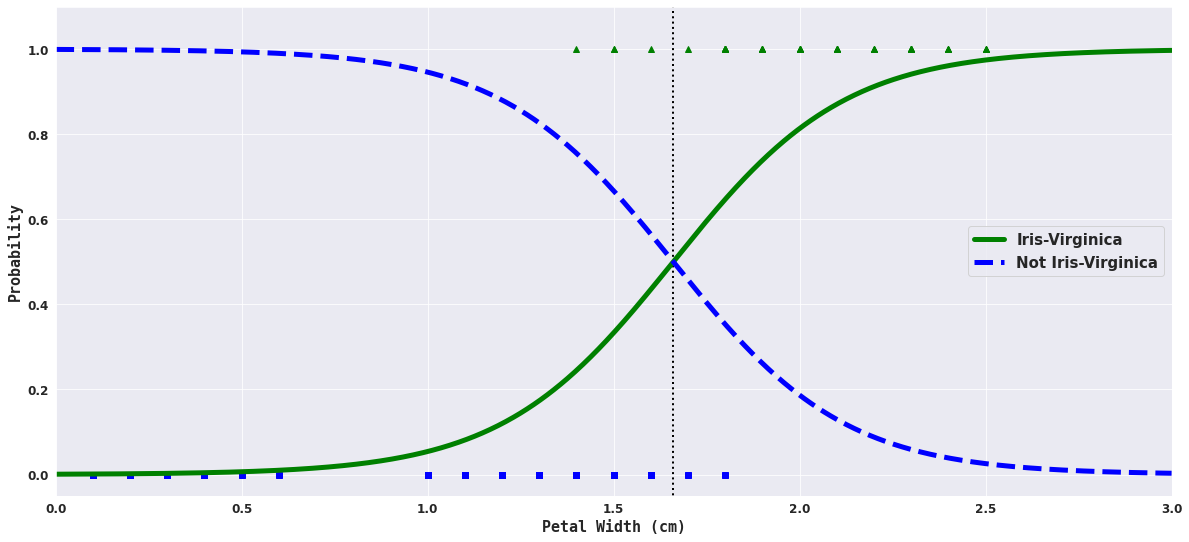

In [187]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc="best")
plt.xlabel('Petal Width (cm)',fontsize=14,font=font)
plt.ylabel('Probability',fontsize=14,font=font,rotation=90)
plt.rcParams["figure.figsize"] = (20,9)
plt.axis([0,3,-0.05,1.1])

plt.show()

he petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-
Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-
Virginica, or else it will predict that it is not (even if it is not very confident):

In [188]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

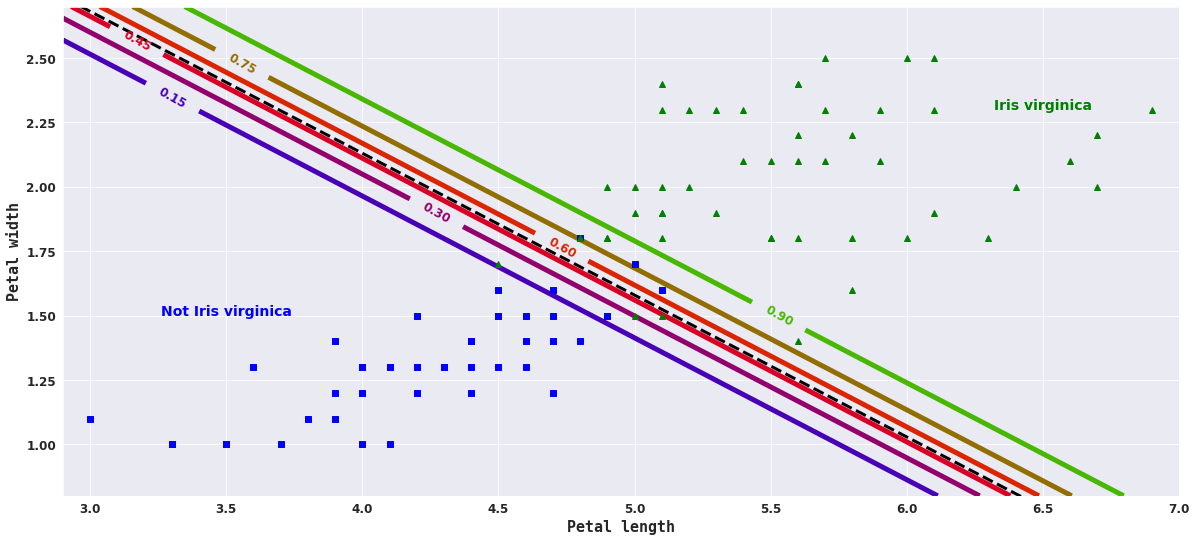

In [191]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
sns.set_style('darkgrid')
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14,font=font)
plt.ylabel("Petal width", fontsize=14,font=font)
plt.axis([2.9, 7, 0.8, 2.7])
plt.rcParams["figure.figsize"] = (20,9)

plt.show()


shows the same dataset but this time displaying two features: petal width
and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. The dashed line
represents the points where the model estimates a 50% probability: this is the model’s
decision boundary. Note that it is a linear boundary. 18 Each parallel line represents the
points where the model outputs a specific probability, from 15% (bottom left) to 90%
(top right). All the flowers beyond the top-right line have an over 90% chance of
being Iris-Virginica according to the model.


Just like the other linear models, Logistic Regression models can be regularized using
l 1 or l 2 penalties. Scitkit-Learn actually adds an l 2 penalty by default.
The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C . The higher the value of C , the less
the model is regularized.


## Softmax Regression:

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers (as discussed in
Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression.
The idea is quite simple: when given an instance x, the Softmax Regression model
first computes a score s k (x) for each class k, then estimates the probability of each
class by applying the softmax function (also called the normalized exponential) to the
scores. The equation to compute s k (x) should look familiar, as it is just like the equation for Linear Regression prediction.

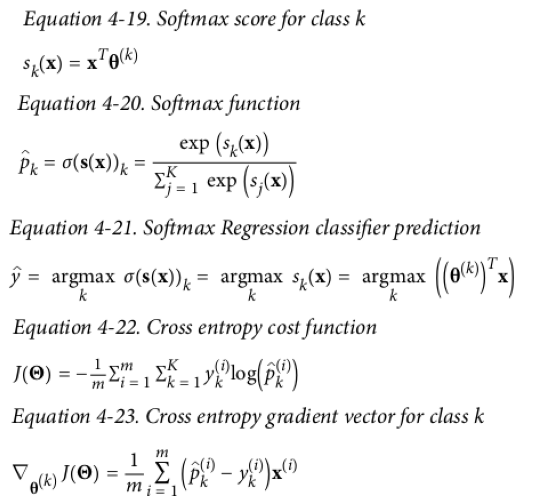

In [193]:
from PIL import Image
dhia_photo=Image.open('/home/dhia/Downloads/65.png')
arr_rhayem=np.array(dhia_photo)
plt.axis('off')
plt.imshow(dhia_photo) 

Note that each class has its own dedicated parameter vector θ (k) . All these vectors are
typically stored as rows in a parameter matrix Θ.
Once you have computed the score of every class for the instance x, you can estimate
the probability p k that the instance belongs to class k by running the scores through
the softmax function (Equation 4-20): it computes the exponential of every score,
then normalizes them (dividing by the sum of all the exponentials). The scores are
generally called logits or log-odds (although they are actually unnormalized log-odds).

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts
the class with the highest estimated probability (which is simply the class with the
highest score), as shown in Equation 4-21.


The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions,
let’s take a look at training. The objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes). Minimizing the cost function shown in Equation 4-22, called the cross
entropy, should lead to this objective because it penalizes the model when it estimates
a low probability for a target class. Cross entropy is frequently used to measure how
well a set of estimated class probabilities match the target classes

In [194]:
# use softmax regression for classification using sklearn
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

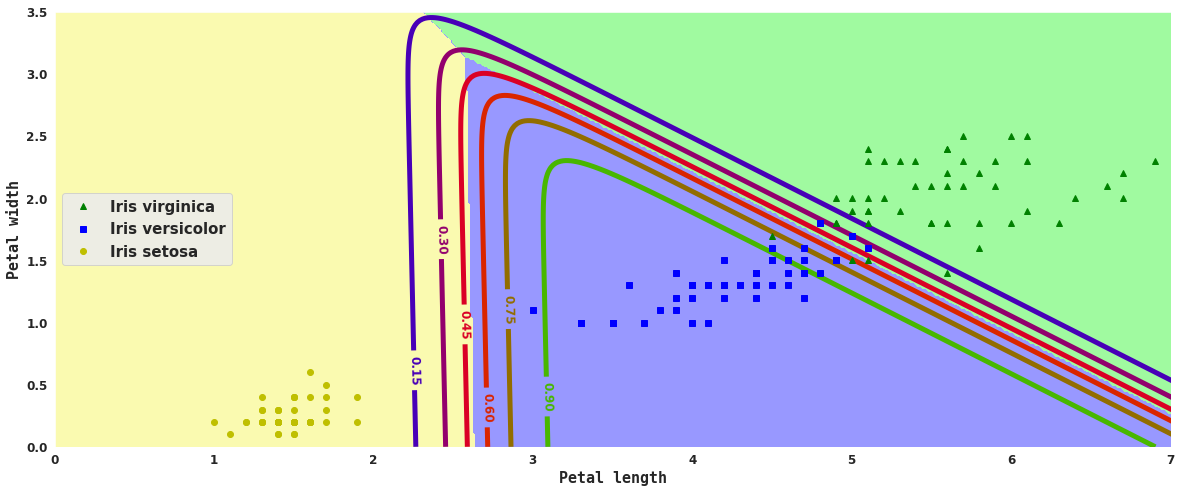

In [199]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(20, 8))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=25,font=font)
plt.ylabel("Petal width", fontsize=25,font=font)
plt.legend(loc="center left", fontsize=15)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [200]:
softmax_reg.predict([[5, 2]])

array([2])

In [201]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])